In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from src.functions.exposures_dataset import database_exposure_country,plot_circle_proportion_in_land, correction_coast_factor,database_exposure_country_coast_corrected,haversine_distance
from src.functions.basic_functions import coordinates_change
from src.functions.weights import weigths_continent

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
steel_plants=pd.read_csv("data\\clean_data\\steel_plants_continent_dataset.csv")
df_gspt=pd.read_csv("data\\clean_data\\steel_factories_dataset_reg.csv")


In [8]:
steel_plants=steel_plants.rename(columns={'Nominal crude steel capacity (ttpa)':'Capacity'})
steel_plants=steel_plants.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])


In [10]:
steel_plants.to_csv("data\\clean_data\\steel_plants.csv")

In [13]:
len(df_gspt[df_gspt['more_than_50km']==False])/len(df_gspt) # 0.375886524822695

0.375886524822695

In [ ]:
database_exposure_country_coast_corrected('india', 50, 'exponential')

In [5]:
database_exposure_country_coast_corrected('mexico', 10, 'exponential',5)

,value,latitude,longitude,impf_TC
0,1.859649e-31,25.208333,-112.125000,1
1,1.164101e-32,24.958333,-112.208333,1
2,4.698622e-33,24.875000,-112.208333,1
3,1.796815e-33,24.791667,-112.291667,1
4,1.896426e-33,24.791667,-112.208333,1
...,...,...,...,...
25084,1.315579e-20,14.625000,-92.291667,1
25085,7.503188e-21,14.625000,-92.208333,1
25086,3.450746e-30,24.208333,-109.875000,1
25087,1.030182e-31,24.541667,-110.375000,1


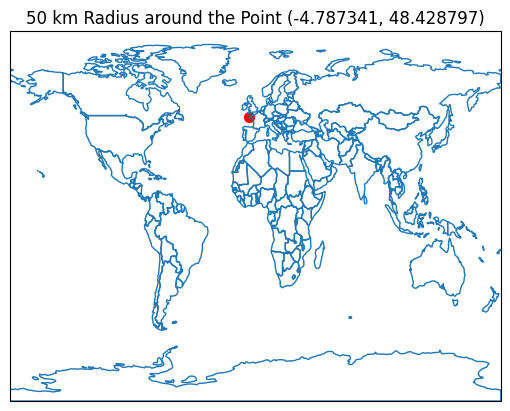

Proportion of the circle on land: 16.834%


In [9]:
plot_circle_proportion_in_land((-4.787341,48.428797,),h=50)

In [4]:
correction_coast_factor((-96.23728,19.1825),h=50)

1.7213546200210628

In [125]:
import plotly.express as px

fig = px.scatter_mapbox(df_gspt, lat="lat", lon="lon", hover_name="Plant name (English)", hover_data=["Region", "Country"],
                        color="more_than_50km", 
                        color_discrete_sequence=["red", "blue"], 
                        zoom=1, 
                        height=560, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [28]:
database_exposure_country_coast_corrected('mexico', 25, 'exponential')

,value,latitude,longitude,impf_TC
0,1.272739e-09,25.208333,-112.125000,1
1,4.112933e-10,24.958333,-112.208333,1
2,2.850325e-10,24.875000,-112.208333,1
3,1.920596e-10,24.791667,-112.291667,1
4,1.978703e-10,24.791667,-112.208333,1
...,...,...,...,...
25084,9.700482e-05,14.625000,-92.291667,1
25085,7.649987e-05,14.625000,-92.208333,1
25086,2.513437e-08,24.208333,-109.875000,1
25087,5.717325e-09,24.541667,-110.375000,1


In [54]:
compare

,true_cap,kernel_cap,coast_correction
index,,,
canada,0.098332,0.108398,0.107748
mexico,0.168188,0.128643,0.133870
usa,0.733481,0.762959,0.758382


In [8]:
country_codes={'india':'IND','japan':'JPN','australia':'AUS','mexico':'MEX','usa':'USA'}
country_continent={'india':'Asia Pacific','japan':'Asia Pacific','australia':'Australia',
                   'mexico':'North America','usa':'North America'}
country_output={'india':1.099165*(10**11),'japan':2.125171*(10**11), 
                'australia':1.351573*(10**10),'mexico':2.066791*(10**10),
                'usa':1.301384*(10**11)} # output from EXIOBASE 2022


In [15]:
countries_nam=['mexico','usa','canada']

In [17]:
data['f_kernel']=data['f_kernel']/data['f_kernel'].sum()

In [4]:
south_america_codes=['ARG','BRA','CHL',
                     'GTM','PER','VEN'
                     ]

north_america_codes=['CAN','USA','MEX']

In [6]:
path="C:\\Users\\Denisa.draghia\\Downloads\\climada_python-1.2.0\\climada_python-1.2.0\\data\\results\\5 minutes\\"

In [6]:
north_am=pd.DataFrame()
for country in north_america_codes:
    print(country)
    c=pd.read_hdf(path+"LitPop_pc_300_arcsec_"+country+"_v1.hdf5")
    c["region_id"]=country
    north_am=pd.concat([north_am,c])
north_am=north_am.reset_index(drop=True)

CAN
USA
MEX


In [7]:
north_am

,value,latitude,longitude,geometry,region_id,impf_
0,1.246857e+02,50.791667,-128.625000,POINT (-128.625 50.79166667),CAN,1
1,2.764769e+03,50.875000,-127.791667,POINT (-127.79166667 50.875),CAN,1
2,3.972300e+03,50.875000,-127.708333,POINT (-127.70833333 50.875),CAN,1
3,3.125587e+02,51.708333,-128.041667,POINT (-128.04166667 51.70833333),CAN,1
4,3.538172e+02,51.625000,-128.125000,POINT (-128.125 51.625),CAN,1
...,...,...,...,...,...,...
429508,1.051088e+06,14.625000,-92.291667,POINT (-92.29166667 14.625),MEX,1
429509,4.788892e+06,14.625000,-92.208333,POINT (-92.20833333 14.625),MEX,1
429510,0.000000e+00,24.208333,-109.875000,POINT (-109.875 24.20833333),MEX,1
429511,2.843701e+03,24.541667,-110.375000,POINT (-110.375 24.54166667),MEX,1


In [113]:
steel_plants[steel_plants['Region']=='North America'].Country.unique()

array(['canada', 'mexico', 'united states'], dtype=object)

In [11]:
data=pd.read_csv("data\\clean_data\\only_steel_database_bycontinent\\only_steel_countries_North America.csv")

In [ ]:
data

In [118]:
north_am.to_csv("only_steel_countries_North America.csv",index=False)

In [11]:
countries_continent={'Central & South America':['argentina','brazil','chile','peru'
                                                ,'venezuela','guatemala'],
                     'North America':['canada','mexico', 'united states']}

In [9]:
def capacity_country_continent(continent,noyau,h):
    data=pd.read_csv("data\\clean_data\\only_steel_database_bycontinent\\only_steel_countries_"+continent+".csv")
    
    
    coordinates=data[['latitude','longitude']].values
    coordinates=np.radians(coordinates)
    h_kernel=round(h/6371,4)
    kde = KernelDensity(bandwidth=h_kernel, metric='haversine',kernel=noyau).set_fit_request(sample_weight=True)
    kde.fit(np.radians(coordinates_change(steel_plants.loc[steel_plants["Region"]==continent])),sample_weight=weigths_continent2(continent))
    
    f_kernel=np.exp(kde.score_samples(coordinates))
    print('ok')
    countries_cont=countries_continent[continent]
    data['f_kernel']=pd.DataFrame(f_kernel)
    kernel_plants_sum=data.groupby("region_id")["f_kernel"].sum().sum()
    kernel_plants=data.groupby("region_id")["f_kernel"].sum()/kernel_plants_sum
    compare=pd.DataFrame()
    compare["index"]=countries_cont
    compare.set_index('index',inplace=True)
    true_cap=steel_plants.loc[steel_plants["Region"]==continent].groupby('Country')['Nominal crude steel capacity (ttpa)'].sum()
    true_cap_sum=steel_plants.loc[steel_plants["Region"]==continent].groupby('Country')['Nominal crude steel capacity (ttpa)'].sum().sum()
    true_cap=true_cap/true_cap_sum
    compare['true_cap']=pd.DataFrame(true_cap.values,index=countries_cont)
    compare['kernel_cap']=pd.DataFrame(kernel_plants.values,index=countries_cont)
    for country in countries_cont:
        print(country)
        
        steel_plants_country=steel_plants.loc[(steel_plants['Country']==country)&(steel_plants['more_than_50km']==False)]
        print(len(steel_plants_country))
        for index,row in steel_plants_country.iterrows():
            lat,lon=row['latitude'],row['longitude']
            correction_factor=correction_coast_factor((lon,lat),h)
            data['distance'] = data.apply(lambda row: haversine_distance((lat,lon), (row['latitude'], row['longitude'])), axis=1)
            data['f_kernel'] = data.apply(lambda row: row['f_kernel'] * correction_factor if row['distance'] < 2*h else row['f_kernel'], axis=1)
    data['f_kernel'] =data['f_kernel']/data['f_kernel'].sum()
    coast_corr=data.groupby('region_id')['f_kernel'].sum()/data.groupby('region_id')['f_kernel'].sum().sum()
    compare['coast_corection_cap']=pd.DataFrame(coast_corr.values,index=countries_cont)
    return compare

In [10]:
a=capacity_country_continent('North America','exponential',h=25)

ok


NameError: name 'countries_continent' is not defined

In [13]:
a.true_cap.values

array([0.09833159, 0.1681876 , 0.73348081])

In [14]:
np.sqrt(np.mean((a.coast_corection_cap.values-a.true_cap.values)**2)) # NEW DISTRIBUTION H=50

0.021058756940735442

In [15]:
a

,true_cap,kernel_cap,coast_corection_cap
index,,,
canada,0.098332,0.113984,0.112257
mexico,0.168188,0.128704,0.138426
united states,0.733481,0.757312,0.749316


In [24]:
#OLD REDISTRIBUTION
np.sqrt(np.mean((np.array([0.106278,0.132259,0.761462])-a.true_cap.values)**2)) 


0.026689302346933206

In [21]:
np.sqrt(np.mean((a.kernel_cap.values-a.true_cap.values)**2))

0.028118347170441555

Analyse of circle distribution


In [16]:
mexico=database_exposure_country('mexico', h=10, noyau='exponential')

In [5]:
len(mexico.value.unique())

25089

In [19]:
lat,lon=26.87689,-101.4166

In [20]:
mexico['distance'] = mexico.apply(lambda x: haversine_distance((lat,lon), (x['latitude'], x['longitude'])), axis=1)


In [32]:
filtered_mexico = mexico[mexico['distance'] <40]

# Sum the 'value' column for the filtered rows
sum_of_values = filtered_mexico['value'].sum()
sum_of_values/mexico_output

NameError: name 'mexico_output' is not defined

In [34]:
mexico_output=2.066791*(10**10)

In [15]:
mexico["value"]

0         0.034067
1         0.021497
2         0.018984
3         0.015579
4         0.016855
           ...    
25084    18.143934
25085    16.059779
25086     0.557806
25087     0.255872
25088     2.199224
Name: value, Length: 25089, dtype: float64

In [23]:
one_plant=steel_plants[steel_plants['Plant name (English)']=='Grupo Acerero steel plant']

In [ ]:
one_plant

In [21]:
mexico=pd.read_hdf("P:\\Projets Internes\\PLADIFES\\PLADIFES DATA CREATION\\Sectorial wealth\\data\\5 minutes\\LitPop_pc_300_arcsec_MEX_v1.hdf5")

In [40]:
10/6371

0.0015696123057604772

In [24]:
coordinates=mexico[['latitude','longitude']].values
coordinates=np.radians(coordinates)
kde = KernelDensity(bandwidth=25/6371, metric='haversine',kernel='exponential')
kde.fit(np.radians(coordinates_change(one_plant)))
f_kernel=np.exp(kde.score_samples(coordinates))

In [25]:
mexico['f_kernel']=pd.DataFrame(f_kernel)
mexico['f_kernel']=mexico['f_kernel']/mexico['f_kernel'].sum()

In [ ]:
mexico

In [26]:
lat,lon=one_plant.latitude.values[0],one_plant.longitude.values[0]

In [27]:
mexico['distance'] = mexico.apply(lambda x: haversine_distance((lat,lon), (x['latitude'], x['longitude'])), axis=1)

In [28]:
dist=[i*5 for i in range(1,21)]
dist

[5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100]

In [29]:
dict={}
for d in dist:
    filtered_mexico = mexico[mexico['distance'] <d]
    sum_of_values = filtered_mexico['f_kernel'].sum()
    dict[d]=sum_of_values
    